In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:


excel_file = 'height-weight.xlsx'
df = pd.read_excel(excel_file)

# Save as CSV
csv_file = 'height-weight.csv'
df.to_csv(csv_file, index=False)

# Read the CSV file
df = pd.read_csv(csv_file)


In [7]:
df.head()

,weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

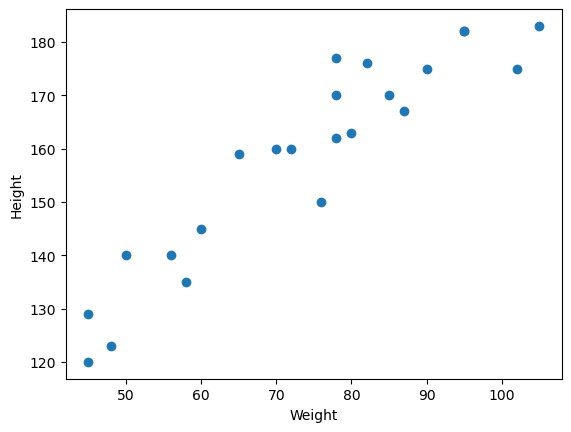

In [9]:
###scatter plot:first you need to see how your dependent and independent variable is related
###since it is a dataset which is made by me so ,i dont have to do feature engineering
plt.scatter(df['weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [10]:
###you can also see the correlation with this
df.corr()

,weight,Height
weight,1.000000,0.933505
Height,0.933505,1.000000


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


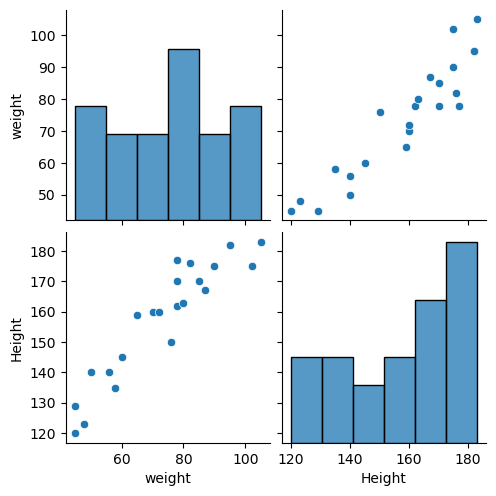

In [11]:
import seaborn as sns
sns.pairplot(df)

In [21]:
#Independent and dependent features
x=df[['weight']] ###always remember that your independent features should be data frame or 2d array
type(x)
np.array(x).shape

(23, 1)

In [22]:
###dependent features can be of series
y=df['Height']
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [23]:
##Train test split
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split()

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
#random state =42 means every time the split will be same when you run train your model

In [25]:
x_train.shape

(17, 1)

In [26]:
###standardization:Standardization is used to scale numerical data so that it has a mean of 0 and a standard deviation of 1. 
###This is important because many machine learning algorithms work better when numerical features have a similar scale.
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [32]:
X_train=scaler.fit_transform(x_train)

In [33]:
X_test = scaler.transform(x_test)

In [34]:
X_test

array([[ 0.30739405],
       [ 0.30739405],
       [-1.63022461],
       [ 1.30556124],
       [-0.45591027],
       [ 1.71657126]])

In [35]:
###Apply linear regression
from sklearn.linear_model import LinearRegression


In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
print("coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

coefficient or slope: [17.22402196]
Intercept: 156.47058823529412


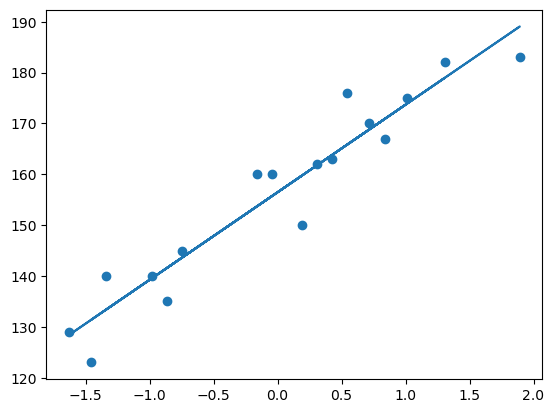

In [41]:
###plot training data,plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [42]:
###Prediction for test data
y_pred=regression.predict(x_test)

In [43]:
###Performance matrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

101.53105165786654
9.387088244182527
10.076261789863667


In [45]:
###Rsquare
from sklearn.metrics import r2_score

In [46]:
score =r2_score(y_test,y_pred)
print(score*100)

76.66697823374915


In [47]:
###Adjusted Rsquare
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7083372279218644

In [49]:
###OLS technique og linear regression
import statsmodels.api as sm

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

In [74]:
X_train_scaled = sm.add_constant(X_train_scaled)

In [75]:
model = sm.OLS(y_train, X_train_scaled).fit()

In [76]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     157.3
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           2.36e-09
Time:                        12:05:43   Log-Likelihood:                -52.533
No. Observations:                  17   AIC:                             109.1
Df Residuals:                      15   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4706      1.373    113.940      0.0

C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [88]:
# Transform test data and add intercept
X_test_scaled = scaler.transform(x_test)
X_test_scaled = sm.add_constant(X_test_scaled)

In [87]:
# Make predictions
prediction = model.predict(X_test_scaled)[2]
print("Predictions:", prediction)

Predictions: 128.39156367800737


In [85]:

x_new = np.array([[72]])  # Single input

# Standardize using the SAME scaler used for training
x_new_scaled = scaler.transform(x_new)

# Add intercept column correctly
x_new_scaled = sm.add_constant(x_new_scaled, has_constant='add')

# Make prediction and extract single value
prediction_new = model.predict(x_new_scaled)[0]

print("Predicted value:", prediction_new)

Predicted value: 1396.6001690127912
